# A Unit Test for BOCD




In [1]:
import numpy
import numpy.random
import numpy.linalg
from functools import partial
from bocd import BOCD, StudentT, constant_hazard
import matplotlib.pyplot as plt
import seaborn as sns

LAMBDA = 100
ALPHA = 0.1
BETA = 1.
KAPPA = 1.
MU = 0.
DELAY = 15
THRESHOLD = 0.5

def series():
    xs = numpy.random.normal(size=1000)
    xs[len(xs) // 4:len(xs) // 2] += 10.
    xs[len(xs) // 2:3 * len(xs) // 4] -= 10.
    return xs

def get_BOCD_changepoints(series):
    """return detected changepoints.
    """
    bocd = BOCD(partial(constant_hazard, LAMBDA),
                StudentT(ALPHA, BETA, KAPPA, MU))
    changepoints = []
    for x in series[:DELAY]:
        bocd.update(x)
    for x in series[DELAY:]:
        bocd.update(x)
        if bocd.growth_probs[DELAY] >= THRESHOLD:
            changepoints.append(bocd.t - DELAY + 1)

    return changepoints

In [2]:
data = series()
# data

array([ 2.35579802e+00,  1.05350656e+00, -6.02296899e-01, -5.41098288e-01,
       -7.21111886e-01,  1.31202069e+00,  3.61745949e-01, -9.88849624e-02,
        4.43457347e-01, -8.29388579e-01,  3.18989539e-01,  4.05630145e-01,
        9.29669585e-01, -3.85313106e-01, -1.95758732e-01,  8.76473555e-02,
       -4.18481237e-01,  7.44640372e-01,  1.35251777e-01, -4.86900524e-01,
        1.30073115e-01,  2.20549981e+00, -8.79347481e-01,  1.86138498e-01,
        2.20224065e+00,  3.78560903e-01,  4.28993528e-01, -2.07144914e-01,
        2.59961860e+00,  8.04000213e-01,  1.90280636e+00, -9.08669545e-01,
        1.85492251e+00,  1.77177460e-01, -4.36627876e-01,  8.07953656e-01,
        2.36842800e-01, -7.85629242e-01, -5.12398197e-01,  6.21897487e-01,
        1.30208409e+00, -2.48835096e-01,  1.43625237e-01, -1.36403751e+00,
        5.80656720e-01,  6.89694051e-01,  9.45914130e-01, -1.45460559e+00,
       -1.49396533e+00,  1.07534630e-01,  2.23281568e-01,  1.75030672e+00,
        5.39953402e-01,  

In [3]:
changepoints = get_BOCD_changepoints(data)
changepoints

[250, 500, 750]

<AxesSubplot:>

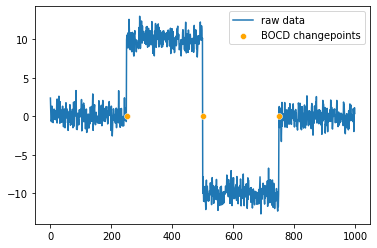

In [4]:
sns.lineplot(data=data, label="raw data")
sns.scatterplot(x=changepoints, y=[0] * len(changepoints), color='orange', zorder=3, label="BOCD changepoints")